# TMDB Box Office Prediction
![](https://i.imgur.com/P1pc13n.jpg)


**I picked a topic from the recommended datasets list given in the project link.<br>
It's the Tmdb kaggle competition which had data for movies from 1920s to 2017.<br>
I have used linear regression, random forests and xgboost for this problem.<br>
and took inspiration from a lot of notebooks on the competition code page**

The details of the data according to the kaggle page is given below:<br>
In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

E.g. The Karate Kid (id: 5266) was released in 1986, while a clearly (or maybe just subjectively) inferior remake (id: 1987) was released in 2010. Also, while the Frozen (id: 5295) released by Disney in 2013 may be the household name, don't forget about the less-popular Frozen (id: 139) released three years earlier about skiers who are stranded on a chairlift...

Acknowledgements
The Movie Database

This dataset has been collected from TMDB. The movie details, credits and keywords have been collected from the TMDB Open API. This competition uses the TMDB API but is not endorsed or certified by TMDB. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.



## Importing libraries

In [1]:
!pip install wordcloud opendatasets scikit-learn --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from wordcloud import WordCloud
from datetime import datetime
import opendatasets as od
import jovian
import os 
import datetime
from collections import Counter
import ast
import os
import opendatasets as od
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

# Downloading the data

In [3]:
od.download("https://www.kaggle.com/c/tmdb-box-office-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anurag2405
Your Kaggle Key: ········


100%|██████████| 17.4M/17.4M [00:00<00:00, 56.8MB/s]



Extracting archive ./tmdb-box-office-prediction/tmdb-box-office-prediction.zip to ./tmdb-box-office-prediction


In [4]:
os.listdir('tmdb-box-office-prediction')

['sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
train = pd.read_csv("tmdb-box-office-prediction/train.csv")
test = pd.read_csv("tmdb-box-office-prediction/test.csv")
submission = pd.read_csv("tmdb-box-office-prediction/sample_submission.csv")

## EDA

In [6]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
train.shape

(3000, 23)

In [8]:
test.shape

(4398, 22)

I think we can drop the poster path

In [9]:
train = train.drop(['poster_path'],axis = 1)
test = test.drop(['poster_path'],axis = 1)

The discussion section has the data which was missing or wrong in the real data set 

In [10]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30
test.loc[test['id'] == 3829,'release_date'] = '05/01/2000'

In [11]:
test.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [13]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


Counting  missing values

In [14]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [15]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
production_companies      258
production_countries      102
release_date                0
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

converting strings to dictionary

In [16]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

Imputing the missing values for 'runtime' by the average values in the dataset.

In [17]:
train['runtime']=train['runtime'].fillna(train['runtime'].mean())
test['runtime']=test['runtime'].fillna(test['runtime'].mean())

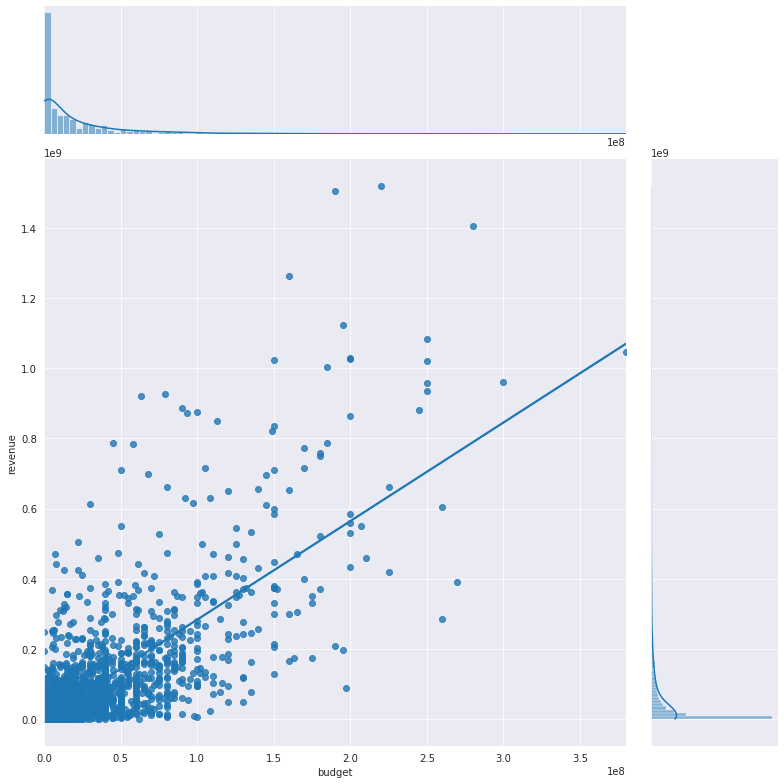

In [18]:
sns.jointplot(x='budget',y='revenue',data = train,kind = 'reg', height=11, ratio=4,
             joint_kws = {'ci' : None});

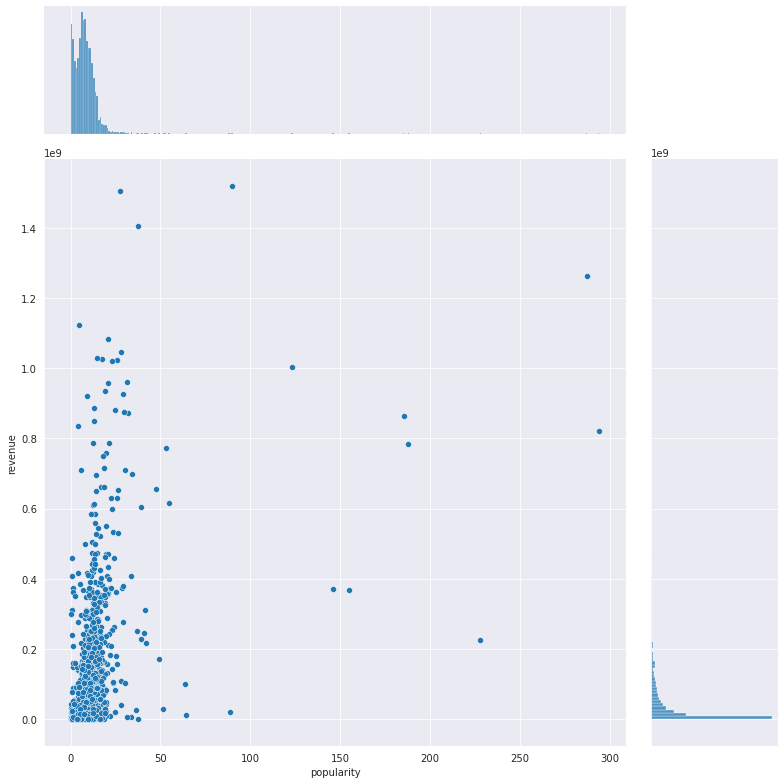

In [19]:
sns.jointplot(x='popularity',y='revenue',data = train, height=11, ratio=4);

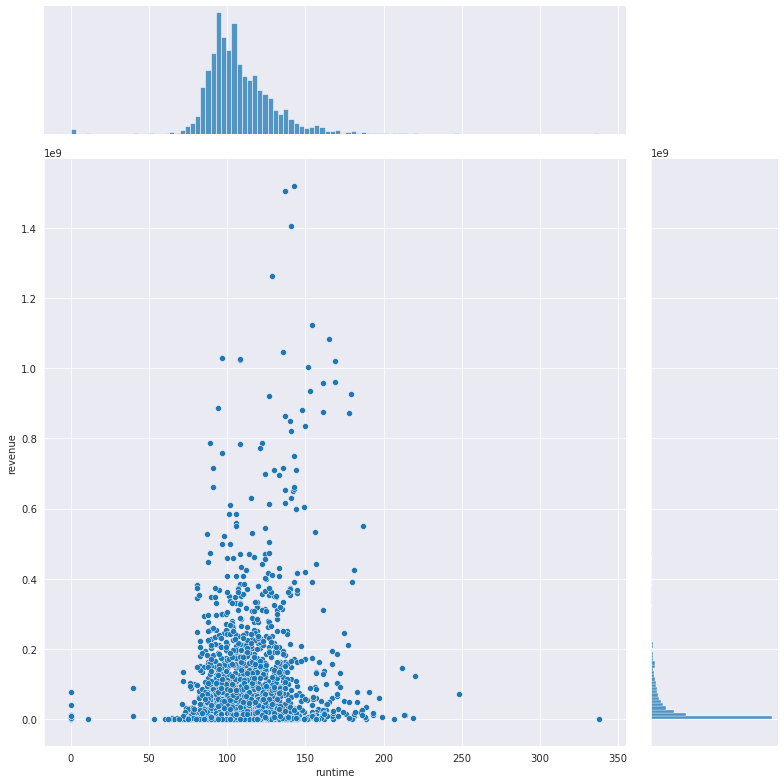

In [20]:
sns.jointplot(x="runtime", y="revenue", data=train, height=11, ratio=4);

People like to watch movies which have moderate runtime neither too high nor too low

In [21]:
train.revenue.describe()

count    3.000000e+03
mean     6.668176e+07
std      1.375149e+08
min      1.000000e+00
25%      2.401550e+06
50%      1.680707e+07
75%      6.877599e+07
max      1.519558e+09
Name: revenue, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

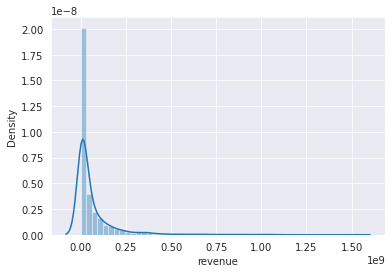

In [22]:
sns.distplot(train.revenue)

In [23]:
test['budget']=np.log1p(test['budget'])
train['budget']=np.log1p(train['budget'])

train['revenue']=np.log1p(train['revenue'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

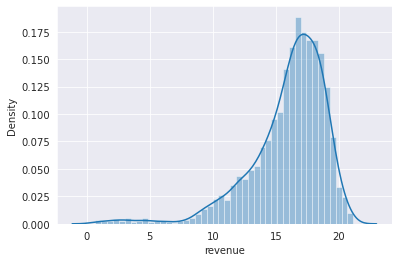

In [24]:
sns.distplot(train.revenue)

In [25]:
# splitting the 'release_date' string to month, date and year
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# the dataset consists of data from 1900s to 2017 
# so since we are only goven the year in 2 digits we add the respective centuries (eg : 12 -> 2012 )

train.loc[ (train['release_year'] <= 20) & (train['release_year'] < 100), "release_year"] += 2000
# eg: 75 -> 1975
train.loc[ (train['release_year'] > 20)  & (train['release_year'] < 100), "release_year"] += 1900
# getting the day of week and quarter of the year
releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

In [26]:
# same for the test set
test[['release_month','release_day','release_year']]=test['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
test.loc[ (test['release_year'] <= 20) & (test['release_year'] < 100), "release_year"] += 2000
test.loc[ (test['release_year'] > 20)  & (test['release_year'] < 100), "release_year"] += 1900
releaseDate = pd.to_datetime(test['release_date']) 
test['release_dayofweek'] = releaseDate.dt.dayofweek
test['release_quarter'] = releaseDate.dt.quarter

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


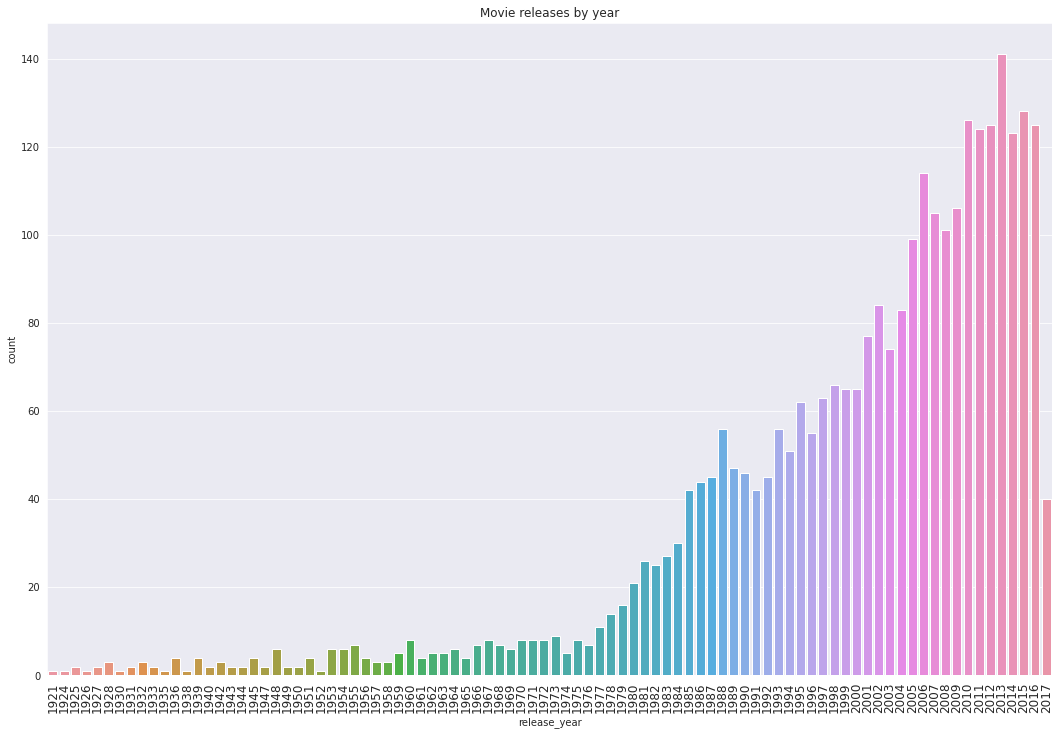

In [27]:
plt.figure(figsize = (18,12))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie releases by year")
plt.xticks(fontsize=12,rotation=90)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


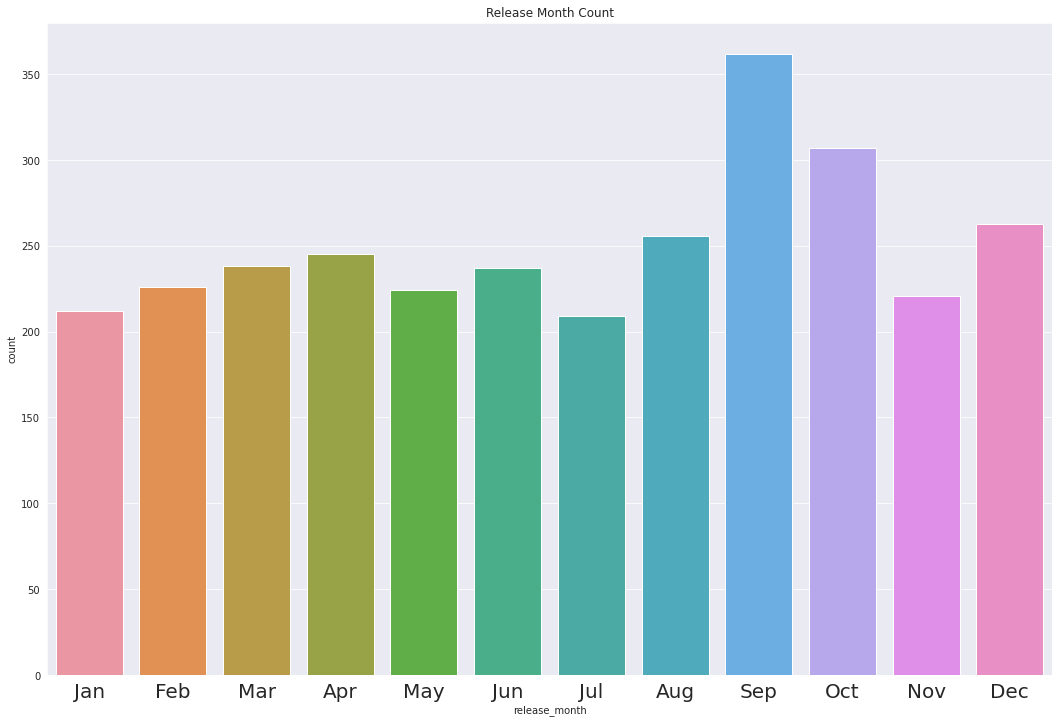

In [28]:
plt.figure(figsize=(18,12))
sns.countplot(train['release_month'].sort_values())
plt.title("Release Month Count")
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


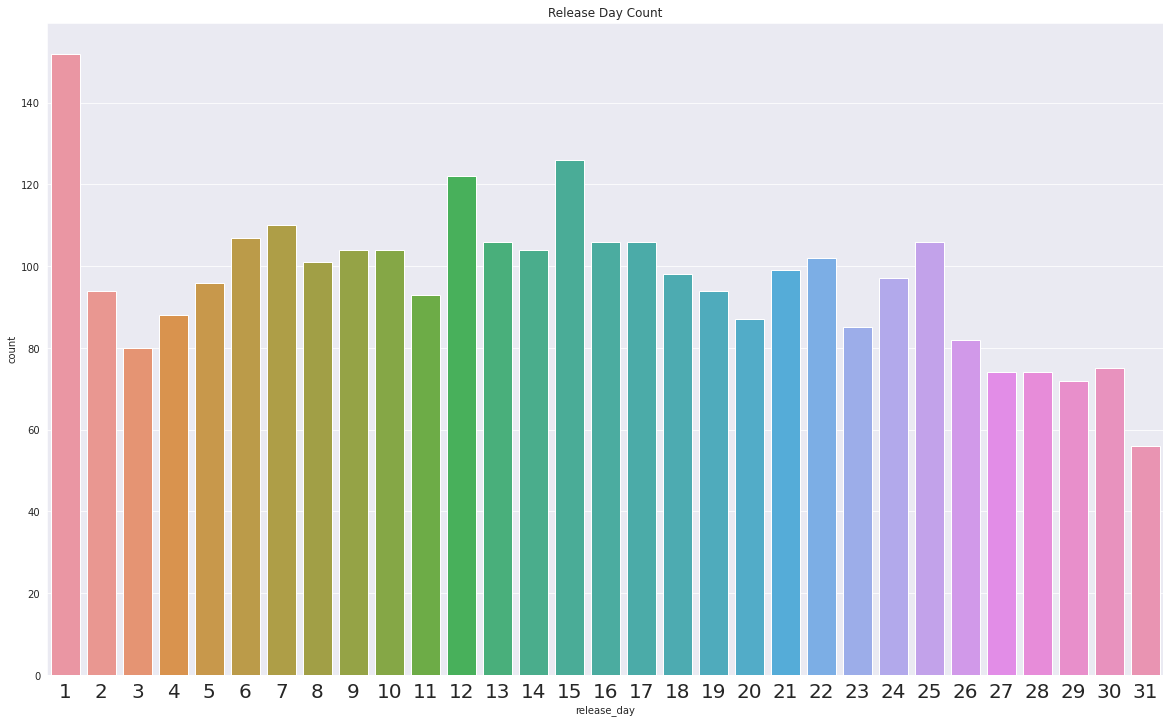

In [29]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_day'].sort_values())
plt.title("Release Day Count")
plt.xticks(fontsize=20)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


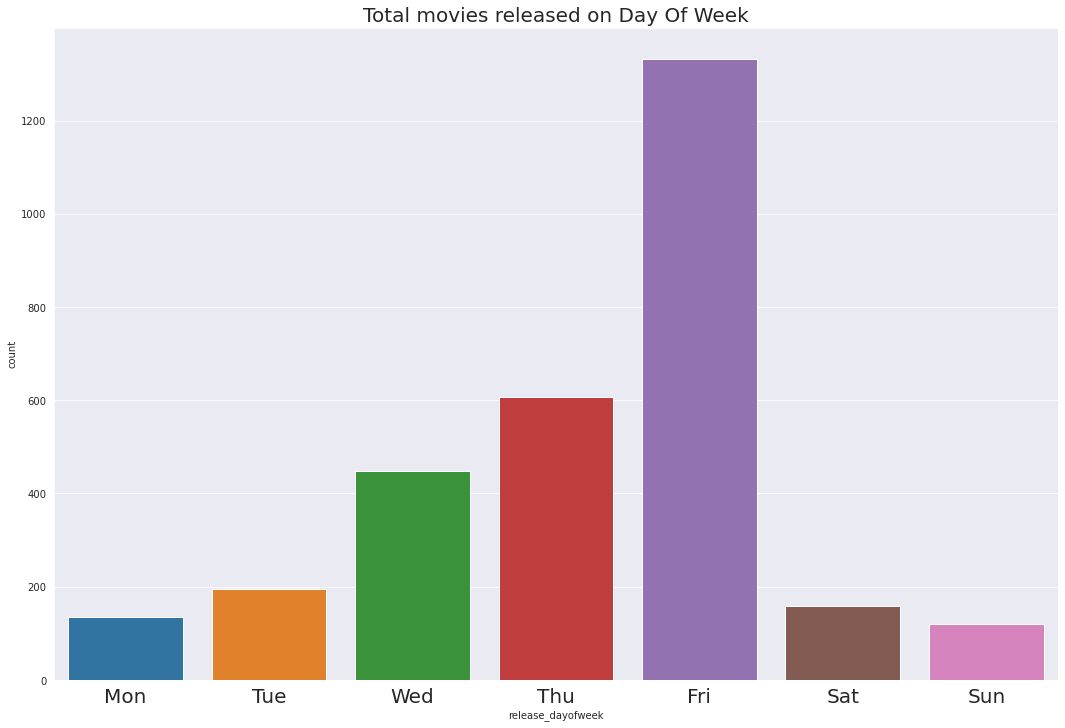

In [30]:
plt.figure(figsize=(18,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


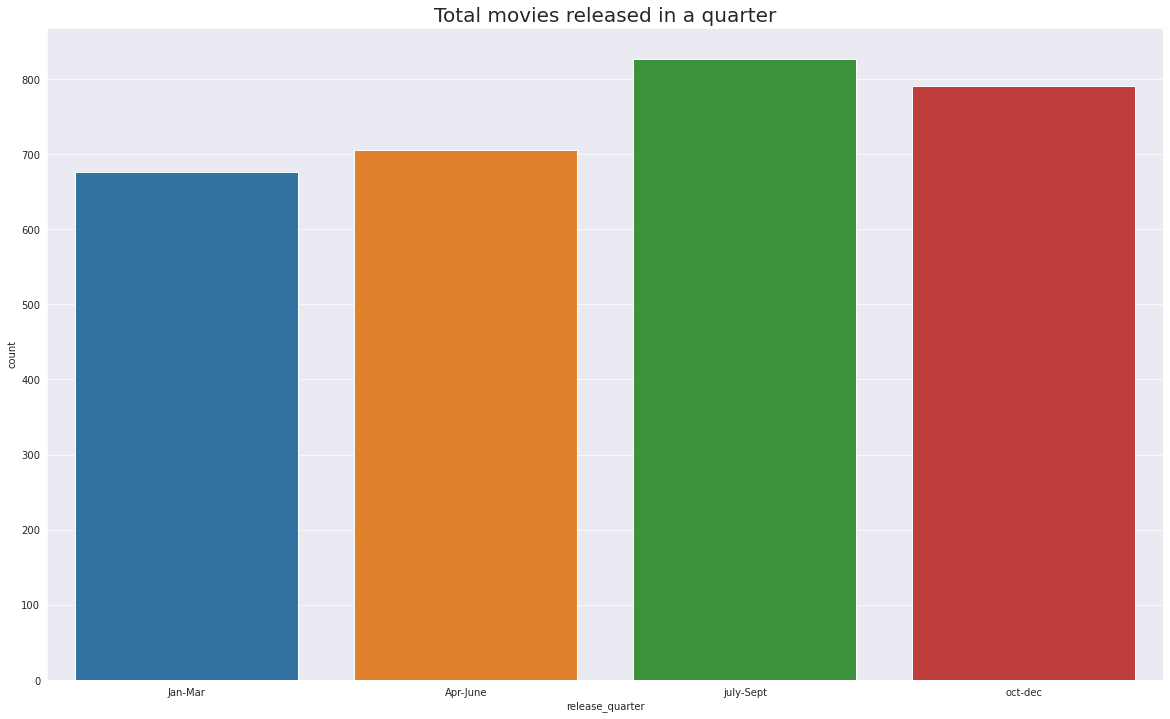

In [31]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=20)
plt.xticks(ticks=[0,1,2,3],labels=['Jan-Mar','Apr-June','july-Sept','oct-dec'])
plt.show()

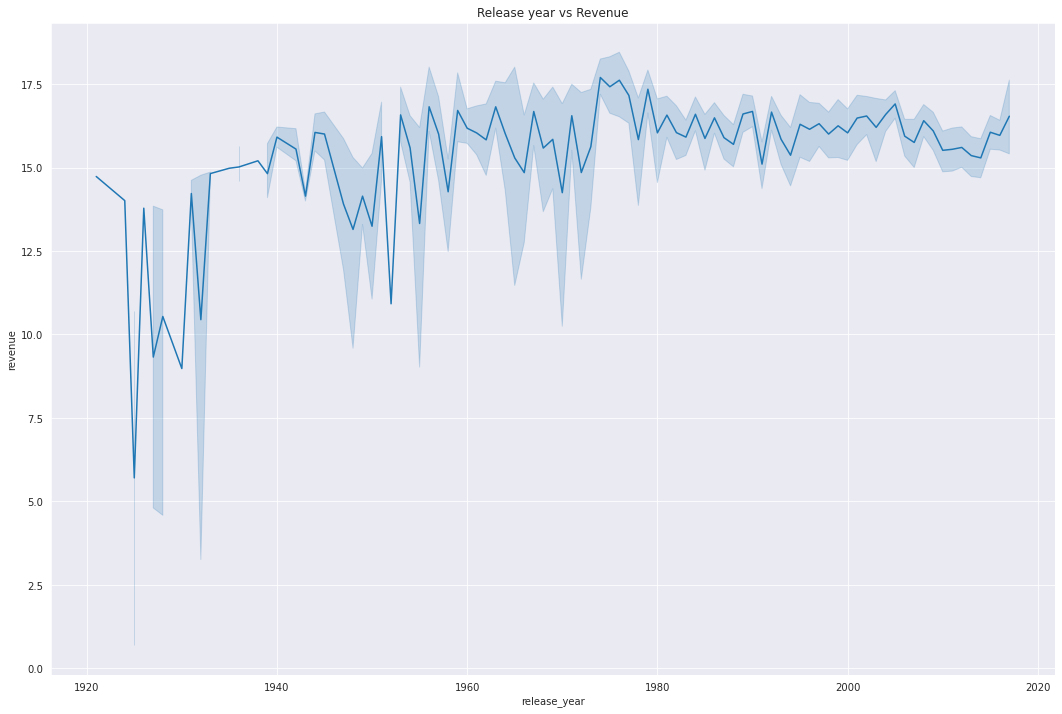

In [32]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='revenue',data = train)
plt.title("Release year vs Revenue")
plt.show()

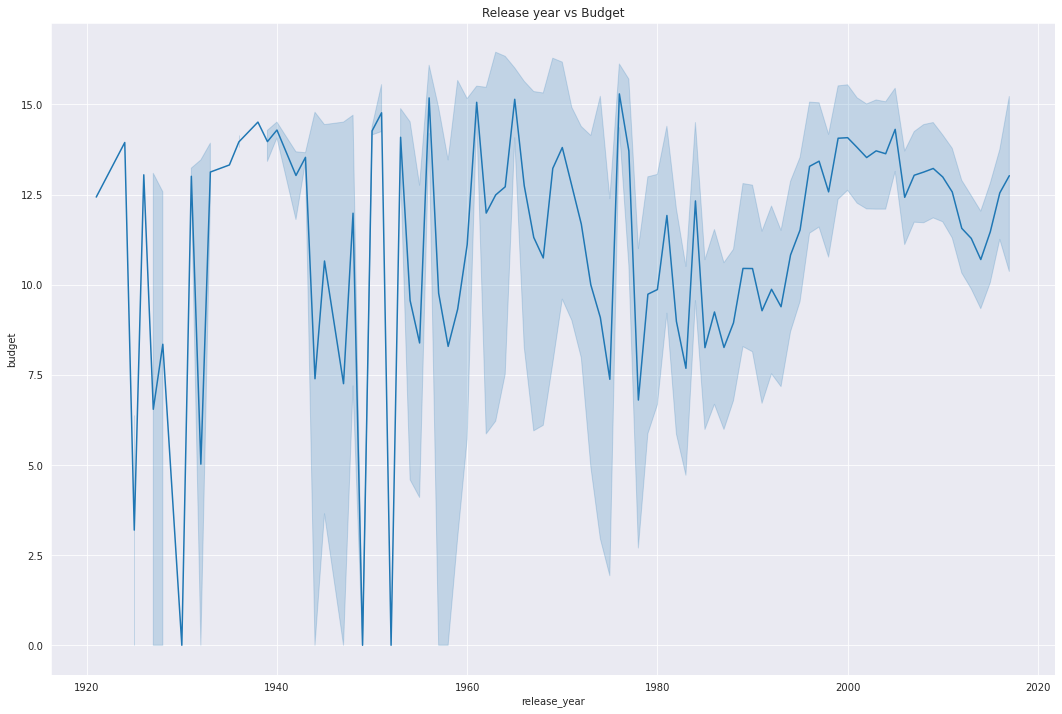

In [33]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='budget',data = train)
plt.title("Release year vs Budget")
plt.show()

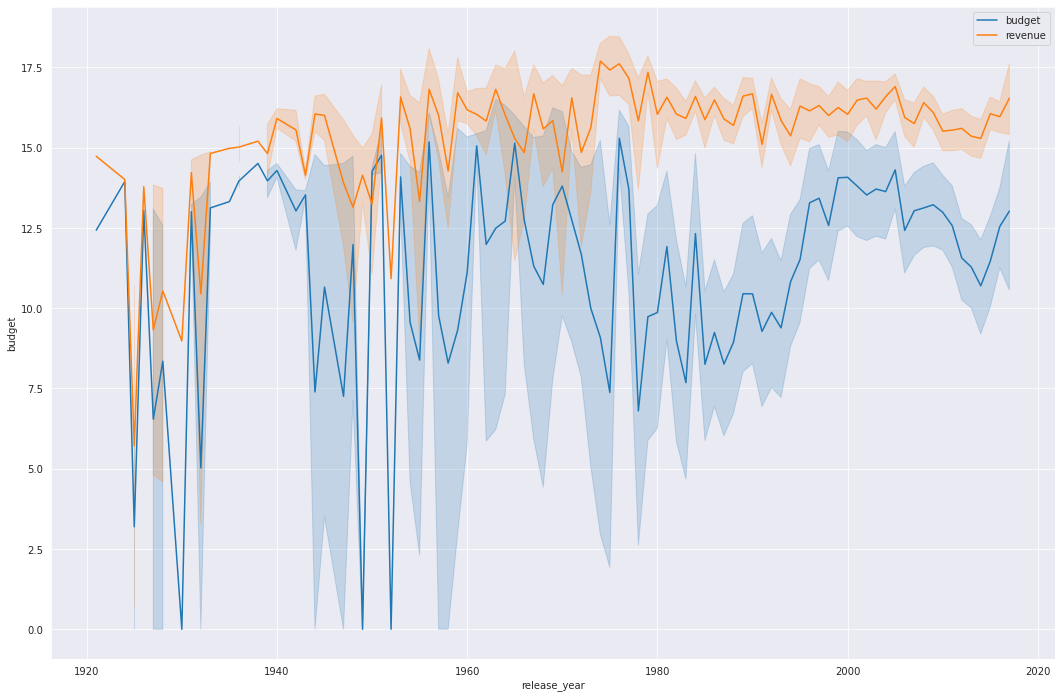

In [34]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='budget',data = train,label = 'budget')
sns.lineplot(x='release_year',y='revenue',data = train,label = 'revenue')
plt.legend()
plt.show()

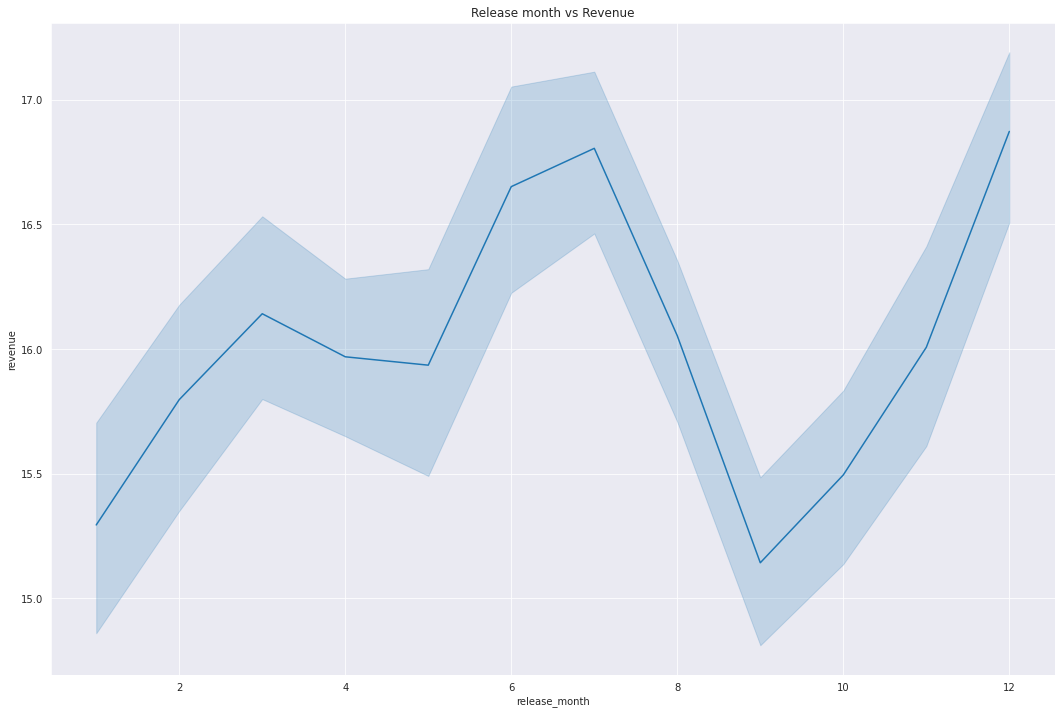

In [35]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_month',y='revenue',data = train)
plt.title("Release month vs Revenue")
plt.show()

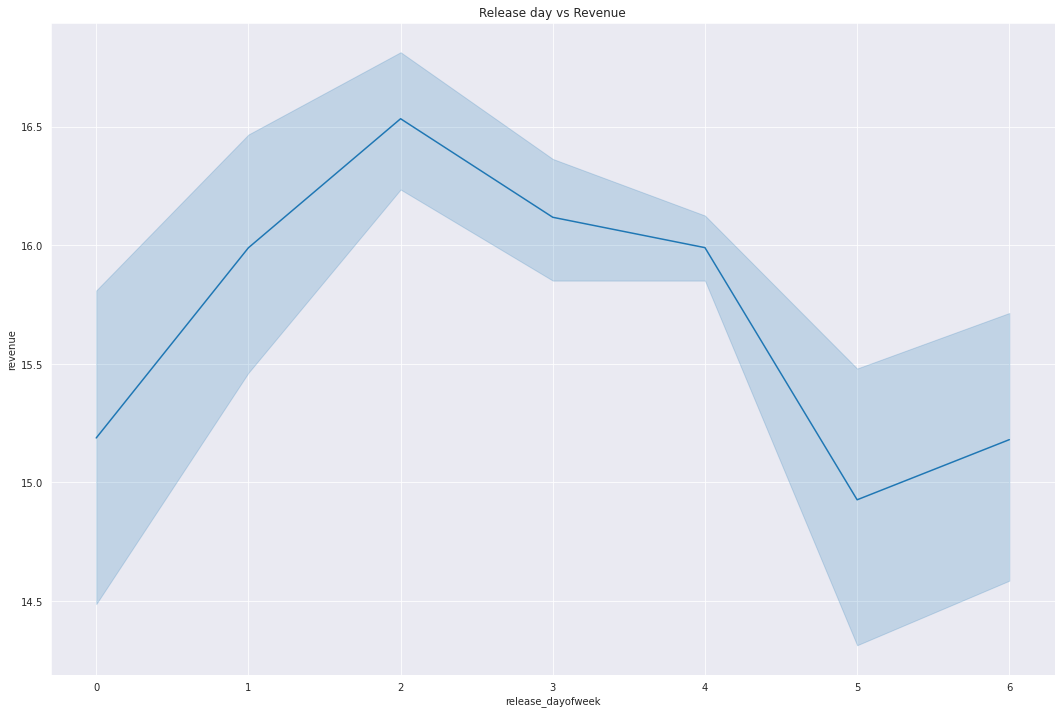

In [36]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_dayofweek',y='revenue',data = train)
plt.title("Release day vs Revenue")
plt.show()

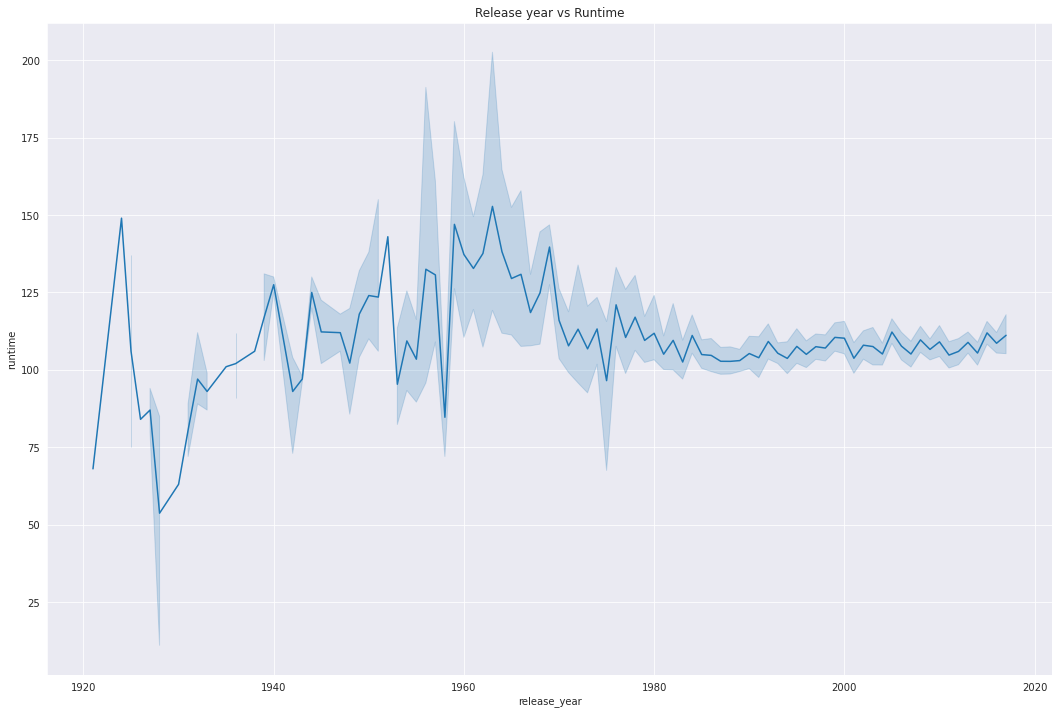

In [37]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='runtime',data = train)
plt.title("Release year vs Runtime")
plt.show()

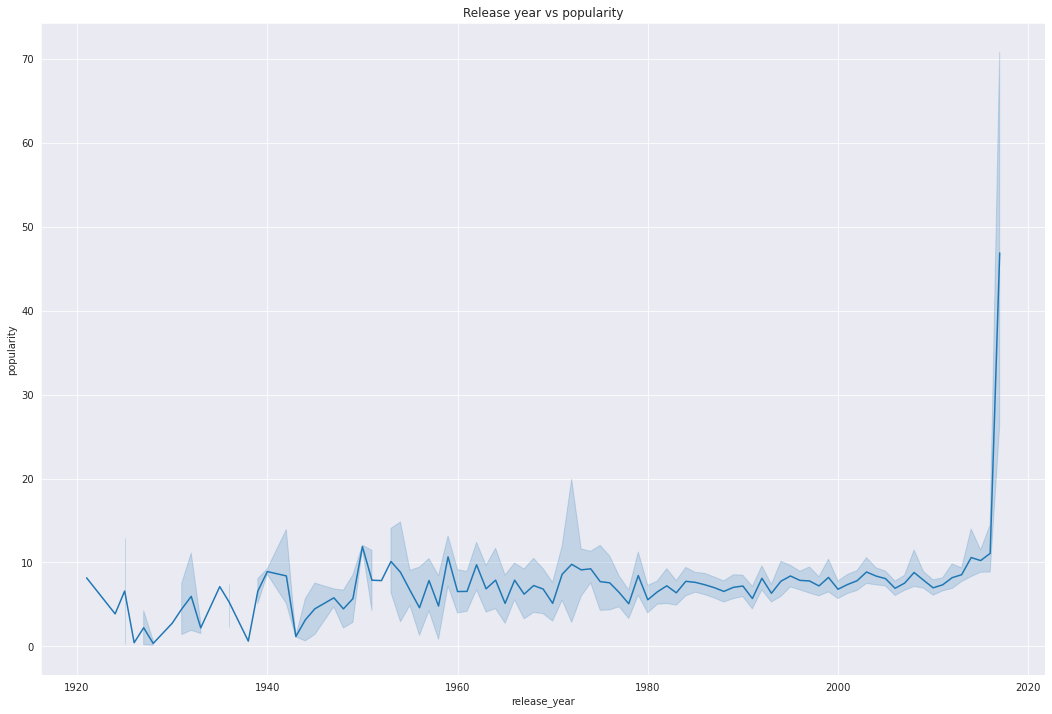

In [38]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='popularity',data = train)
plt.title("Release year vs popularity")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


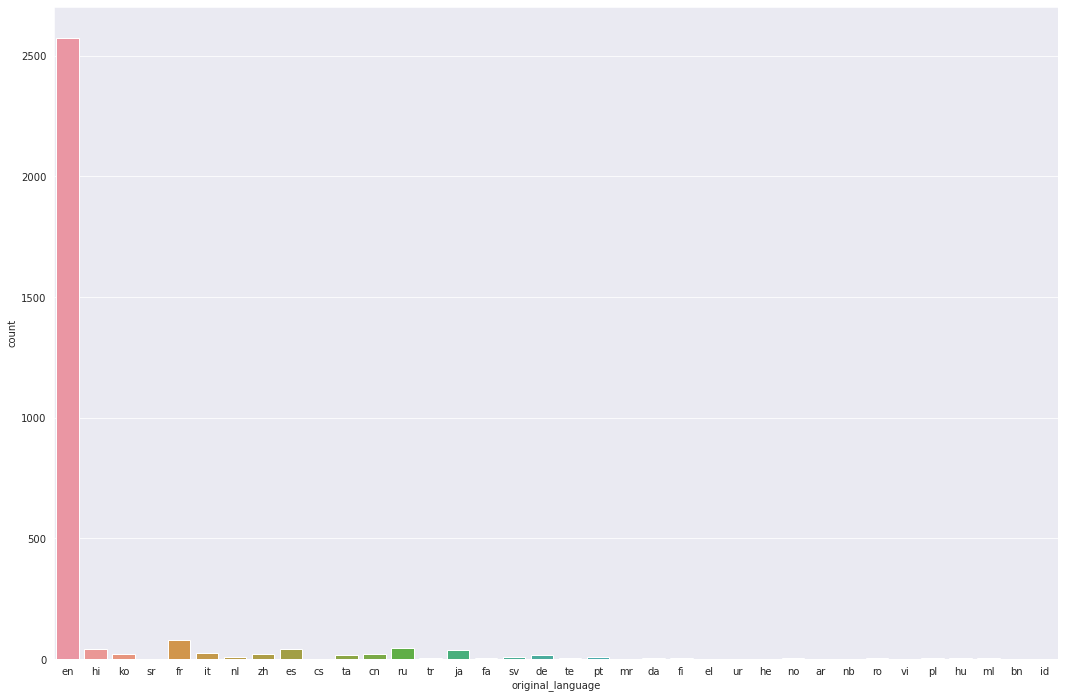

In [39]:
plt.figure(figsize = (18,12))
sns.countplot(train.original_language)
plt.show()

In [40]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [41]:
train['is_released'] = train['status'].apply(lambda x: 1 if x == 'Released' else 0)
test['is_released'] = test['status'].apply(lambda x: 1 if x == 'Released' else 0)

only 4 movies are rumored the rest are released

In [42]:
train['has_homepage'] = train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
test['has_homepage'] = test['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

In [43]:
train = train.drop(['homepage'],axis = 1)
test = test.drop(['homepage'],axis = 1)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


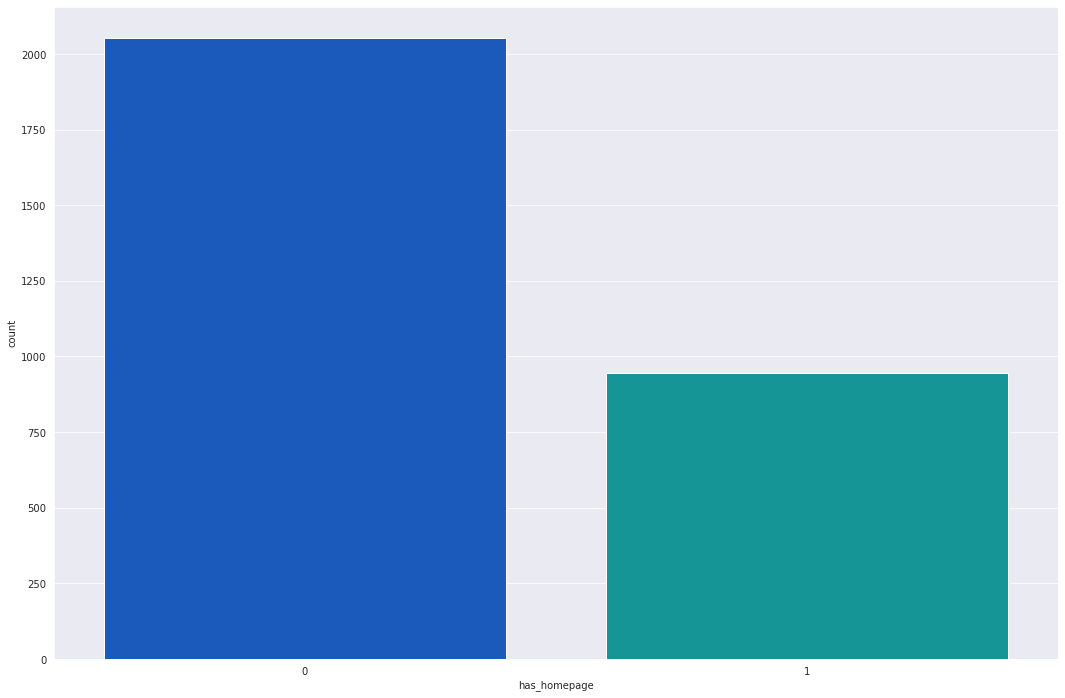

In [44]:
plt.figure(figsize = (18,12))
sns.countplot(train['has_homepage'],palette='winter')
plt.show()

most of the movies dont have a homepage

Does having a homepage eaffect the revenue

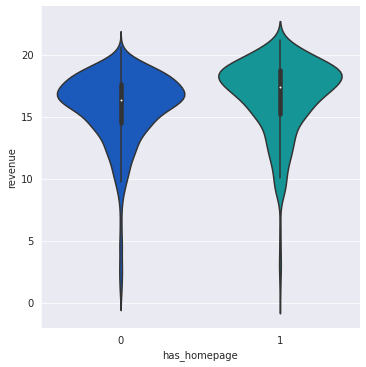

In [45]:
sns.catplot(x = 'has_homepage',y='revenue',data = train,kind = 'violin',palette='winter')

In [46]:
train['has_a_tagline'] = train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
test['has_a_tagline'] = test['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


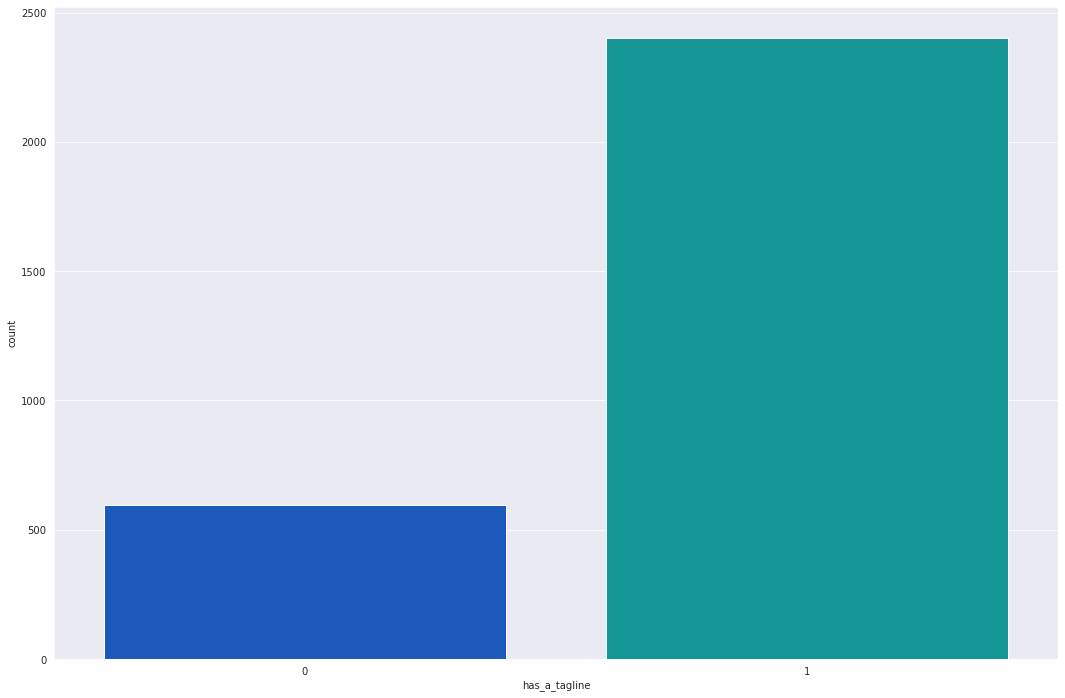

In [47]:
plt.figure(figsize = (18,12))
sns.countplot(train['has_a_tagline'],palette='winter')
plt.show()

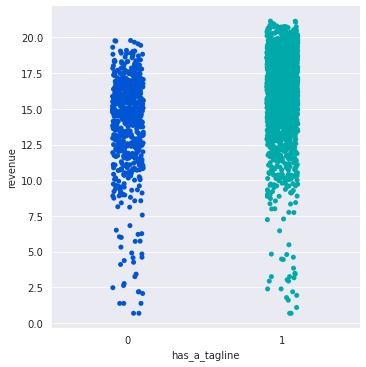

In [48]:
sns.catplot(x = 'has_a_tagline',y='revenue',data = train,palette='winter')

In [49]:
train['originallang_en'] = train['original_language'].apply(lambda x: 1 if x == 'en'else 0)
test['originallang_en'] = test['original_language'].apply(lambda x: 1 if x == 'en'else 0)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


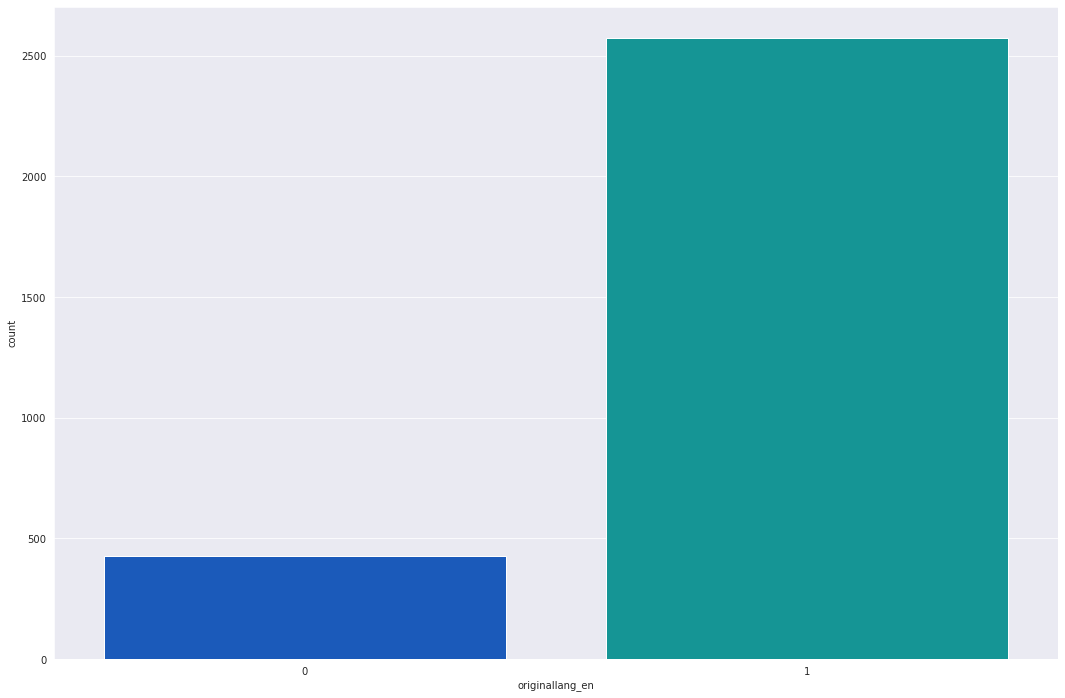

In [50]:
plt.figure(figsize = (18,12))
sns.countplot(train['originallang_en'],palette='winter')
plt.show()

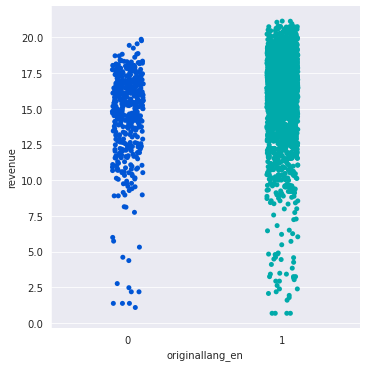

In [51]:
sns.catplot(x = 'originallang_en',y='revenue',data = train,palette='winter')

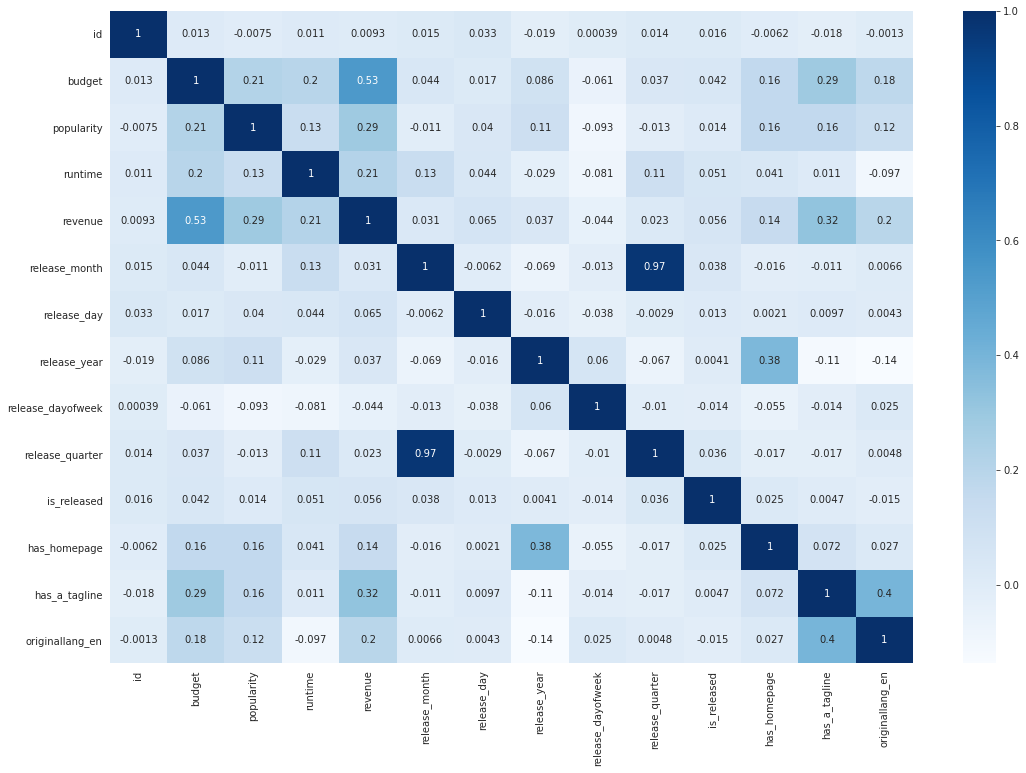

In [52]:
plt.figure(figsize = (18,12))
sns.heatmap(train.corr(),annot = True,cmap = 'Blues');

## Lets start with 'belongs_to_collection' column

counting missing values

In [53]:
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

2396 values in this column are empty, 604 contrain information about the collections.

Adding a collection_name column which contains name of the collection (for eg: 'Hot Tub Time Machine Collection')

In [54]:
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else '')

Adding a collection_name column which will tell if the movie belongs to a specific colllection<br>
1 : if movie belongs to a collection<br>
0 : if it does'nt belong to any collection

In [55]:
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

Doing the same for the test set

In [56]:
test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else '')
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

Now we dont need the 'belongs_to_collection' column do we will drop it in both the sets

In [57]:
train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

## Now lets deal with then 'genres' column
one movie can have multiple genres

How many genres do films have

In [58]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

Now lets make a list of genres to find out which genres are the most popular

In [59]:
genre_list = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []))

In [60]:
genre_list

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

We can plot a word cloud to show the genres which are the most popular

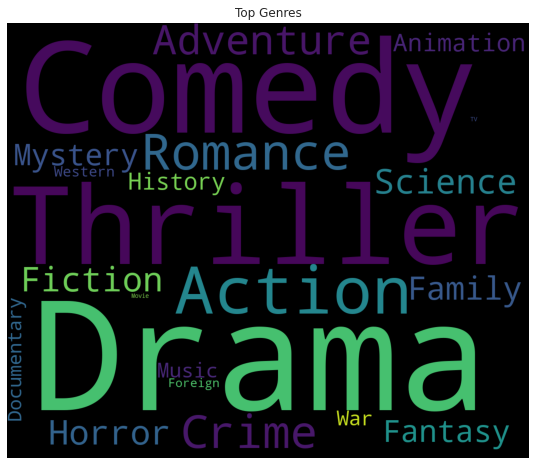

In [61]:
plt.figure(figsize = (12,8))
text = ' '.join(i for j in genre_list for i in j)
word_cld = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(word_cld)
plt.title("Top Genres")
plt.axis("off")
plt.show();

In [62]:
Counter([i for j in genre_list for i in j])

Counter({'Comedy': 1028,
         'Drama': 1531,
         'Family': 260,
         'Romance': 571,
         'Thriller': 789,
         'Action': 741,
         'Animation': 141,
         'Adventure': 439,
         'Horror': 301,
         'Documentary': 87,
         'Music': 100,
         'Crime': 469,
         'Science Fiction': 290,
         'Mystery': 225,
         'Foreign': 31,
         'Fantasy': 232,
         'War': 100,
         'Western': 43,
         'History': 132,
         'TV Movie': 1})

These are the most watched genres

Lets create a column which shows how many genres does a movie belongs to

In [63]:
train['num_genres'] = train['genres'].apply(lambda x:len(x) if x!= {} else 0)

encoding the genres which appear the most

In [64]:
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

In [65]:
top_genres =[ m[0] for m in Counter([i for j in genre_list for i in j]).most_common(20)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)

Now doing the same for the test set

In [66]:
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)


We dont need the genre column any more so we can drop it from both the sets

## Original title wordcloud for the most common titles

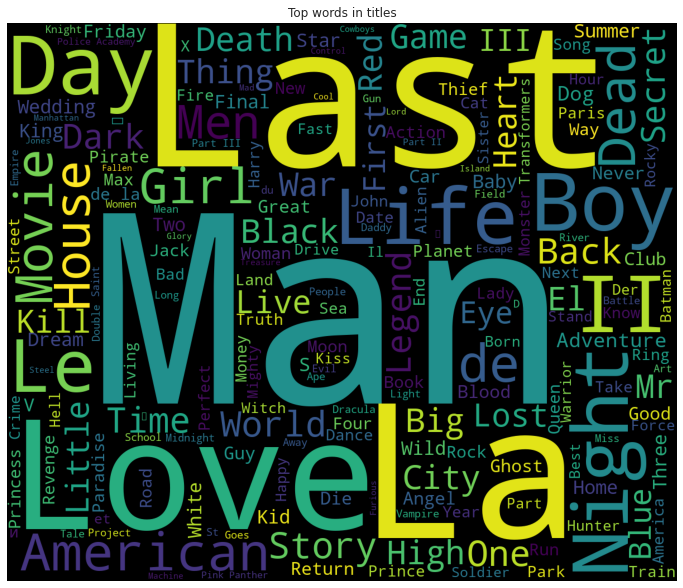

In [67]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

## overview

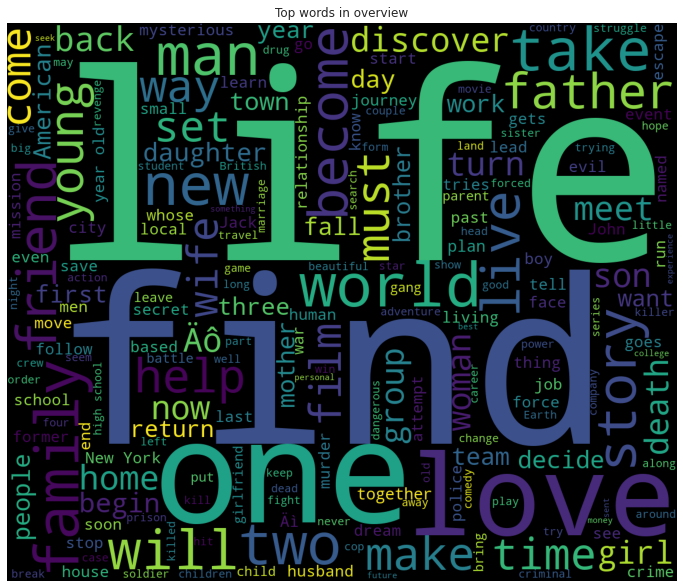

In [68]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

## Now lets take the 'production_companies' column

How many production companies are involved in making films

In [69]:
train['production_companies'].apply(lambda x: len(x) if x!= {} else 0 ).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: production_companies, dtype: int64

Looks like most of the movies have 1 or 2 production companies

In [70]:
company_list = list(train['production_companies'].apply(lambda x:[i['name'] for i in x] if x != {} else []).values)

In [71]:
Counter([i for j in company_list for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

making a column for the number of companies involved in making the movie

In [72]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)

Encoding the top 30 companies

In [73]:
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in company_list for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)

Same for the test set

In [74]:
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

now we can drop the 'production_companies' column

In [75]:
train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

## production_countries column

In [76]:
print('Number of production countries in films')
train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In [77]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [78]:
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)


Encoding the top 25 countries

In [79]:
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)

same for the test set

In [80]:
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

Dropping the 'production_countries' column

In [81]:
train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

## spoken_languages column

In [82]:
print('Number of spoken languages in films')
train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

list of most common languages

In [83]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common()

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27),
 ('Polski', 25),
 ('Magyar', 24),
 ('Latin', 23),
 ('svenska', 22),
 ('ภาษาไทย', 22),
 ('Český', 20),
 ('עִבְרִית', 15),
 ('ελληνικά', 15),
 ('Türkçe', 13),
 ('Dansk', 13),
 ('Nederlands', 10),
 ('فارسی', 10),
 ('Tiếng Việt', 10),
 ('اردو', 8),
 ('Română', 8),
 ('తెలుగు', 7),
 ('Kiswahili', 7),
 ('Norsk', 7),
 ('No Language', 7),
 ('suomi', 6),
 ('Український', 6),
 ('Srpski', 4),
 ('Afrikaans', 4),
 ('Gaeilge', 3),
 ('Català', 3),
 ('বাংলা', 3),
 ('ਪੰਜਾਬੀ', 3),
 ('Somali', 3),
 ('Íslenska', 3),
 ('български език', 2),
 ('shqip', 2),
 ('Bahasa indonesia', 2),
 ('Slovenčina', 2),
 ('Esperanto', 2),
 ('euskera', 2),
 ('isiZulu', 2),
 ('Hrvatski', 2),
 ('қазақ', 1),
 ('Wolof', 1),
 ('Eesti', 1),
 ('پښتو', 1)]

Number of languages spoken in movies

In [84]:
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

Encoding the most common languages

In [85]:
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)

In [86]:
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

Dropping the 'spoken_languages' column 

In [87]:
train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

## keywords

In [88]:
print('Number of Keywords in films')
train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Keywords, dtype: int64

In [89]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

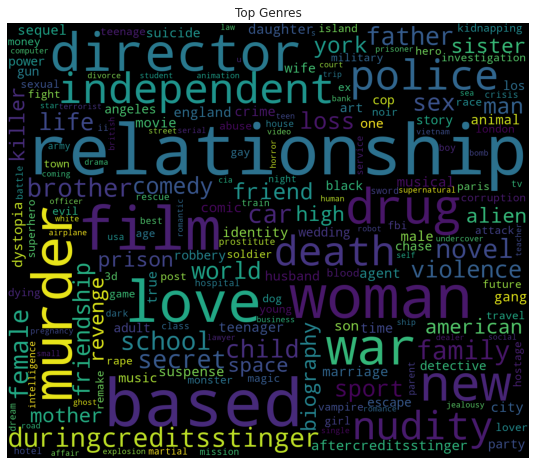

In [90]:
plt.figure(figsize = (12,8))
text = ' '.join(i for j in list_of_keywords  for i in j)
wordcld = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcld)
plt.title("Top Genres")
plt.axis("off")
plt.show();

Column for number of keywords

In [91]:
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)

encoding for most common keywords

In [92]:
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)

In [93]:
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

Dropping the Keywords column

In [94]:
train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

## Cast

In [95]:
print('Number of casted persons in films')
train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


15    212
16    165
10    135
13    129
12    124
11    122
17    118
9     118
18    115
14    110
Name: cast, dtype: int64

Most popular ones are

In [96]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

Gender of the cast

0 is unspecified, 1 is female, and 2 is male

In [97]:
list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

Characters played

In [98]:
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

Creating number column for the cast

In [99]:
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)

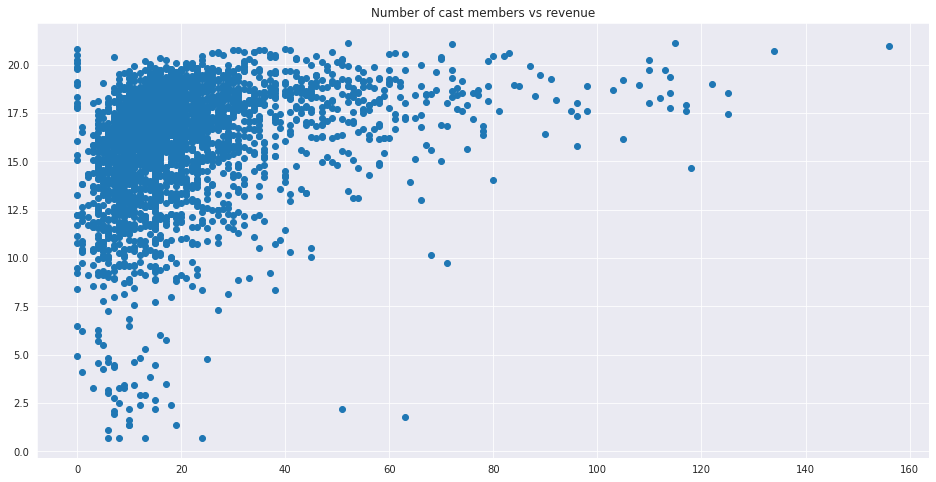

In [100]:
plt.figure(figsize=(16, 8))
plt.scatter(train['num_cast'], train['revenue'])
plt.title('Number of cast members vs revenue');

Encoding the top cast names

In [101]:
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)

Encoding the cast according to their Genders

In [102]:
train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

Encoding the characters played

In [103]:
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)

Doing the same for the test set

In [104]:
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

In [105]:
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)

Dropping the cast column

In [106]:
train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

## Crew column

In [107]:
print('Number of crew members')
train['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of crew members


2     179
11    127
10    126
3     126
12    110
8     109
9     109
14    104
4     101
7      94
Name: crew, dtype: int64

In [108]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

Crew jobs

In [109]:
list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650),
 ('Costume Design', 1573),
 ('Writer', 1523),
 ('Set Decoration', 1345),
 ('Makeup Artist', 1108),
 ('Sound Re-Recording Mixer', 970)]

Crew genders

In [110]:
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)

[(0, 41787), (2, 24898), (1, 6412)]

In [111]:
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

Creating Number of crew members column

In [112]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)

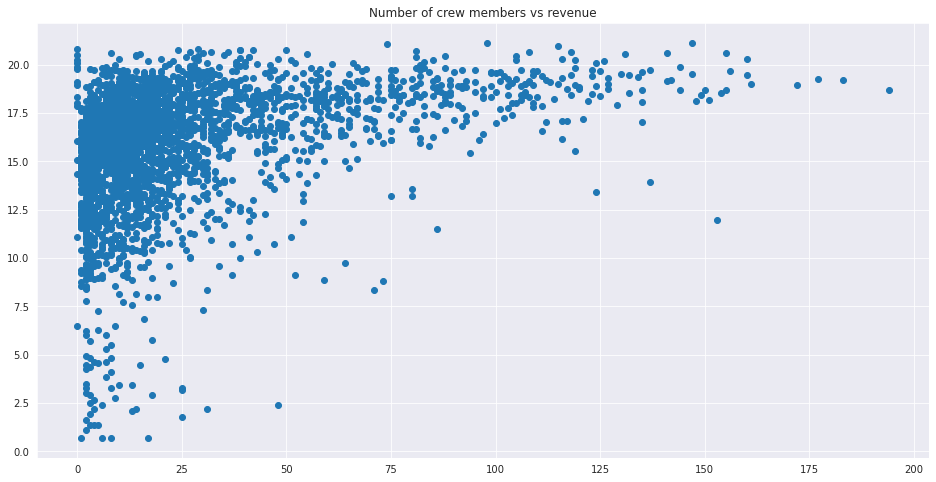

In [113]:
plt.figure(figsize=(16, 8))
plt.scatter(train['num_crew'], train['revenue'])
plt.title('Number of crew members vs revenue');

In [114]:
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)

In [115]:
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

Encoding the most common crew jobs and departments

In [116]:
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

Applying the same to the test set

In [117]:
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
cat_cols = ['original_language','collection_name']

In [120]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [121]:
encoded_cols = list(encoder.get_feature_names(cat_cols))
print(encoded_cols)

['original_language_ar', 'original_language_bn', 'original_language_cn', 'original_language_cs', 'original_language_da', 'original_language_de', 'original_language_el', 'original_language_en', 'original_language_es', 'original_language_fa', 'original_language_fi', 'original_language_fr', 'original_language_he', 'original_language_hi', 'original_language_hu', 'original_language_id', 'original_language_it', 'original_language_ja', 'original_language_ko', 'original_language_ml', 'original_language_mr', 'original_language_nb', 'original_language_nl', 'original_language_no', 'original_language_pl', 'original_language_pt', 'original_language_ro', 'original_language_ru', 'original_language_sr', 'original_language_sv', 'original_language_ta', 'original_language_te', 'original_language_tr', 'original_language_ur', 'original_language_vi', 'original_language_zh', 'collection_name_', 'collection_name_... Has Fallen Collection', 'collection_name_12 Rounds Collection', 'collection_name_2 Days In... 

In [122]:
new_train = train.copy()
new_test = test.copy()

In [123]:
new_train[encoded_cols] = encoder.transform(new_train[cat_cols])
new_test[encoded_cols] = encoder.transform(new_test[cat_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [124]:
train = new_train.copy()
test = new_test.copy()

Adding additional Features

In [125]:
train['bud_runtime']=(train['budget']+1)/(train['runtime']+1)

train['bud_year']=(train['budget']+1)/(train['release_year']+1)

train['bud_popularity']=(train['budget']+1)/(train['popularity']+1)

train['runtime_year']=(train['runtime']+1)/(train['release_year']+1)

train['popularity_year']=(train['popularity']+1)/(train['release_year']+1)

In [126]:
test['bud_runtime']=(test['budget']+1)/(test['runtime']+1)

test['bud_year']=(test['budget']+1)/(test['release_year']+1)

test['bud_popularity']=(test['budget']+1)/(test['popularity']+1)

test['runtime_year']=(test['runtime']+1)/(test['release_year']+1)

test['popularity_year']=(test['popularity']+1)/(test['release_year']+1)

Dropping a few columns

In [127]:
train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

In [128]:
train = train.drop(['imdb_id','release_date', 'status'], axis=1)
test = test.drop(['imdb_id','release_date', 'status'], axis=1)

In [129]:
train = train.drop(['genres','all_genres'], axis=1)
test = test.drop(['genres','all_genres'], axis=1)

In [130]:
train.shape, test.shape

((3000, 705), (4398, 704))

## Creating Models

In [131]:
y = train['revenue']

In [132]:
X = train.drop(['original_language','overview','tagline','title','id','revenue','original_title'],axis = 1)

In [133]:
test = test.drop(['original_language','overview','tagline','title','id','original_title'],axis = 1)

In [134]:
X = X.drop(['collection_name'],axis = 1)

In [135]:
test = test.drop(['collection_name'],axis = 1)

In [136]:
X.shape,y.shape,test.shape

((3000, 697), (3000,), (4398, 697))

## Linear Regression

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=39)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [139]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [140]:
lr_pred=linreg.predict(X_val)

In [141]:
lr_rmse= mean_squared_error(y_val, lr_pred, squared=False)
lr_rmse

2.6566560801126853

In [142]:
linreg.fit(X,y)
lr_full = linreg.predict(test)

In [143]:
lr_full

array([16.98082733, 14.4132843 , 15.52294922, ..., 16.68977356,
       15.90427399, 13.52799225])

In [144]:
lr_full = np.array(lr_full, dtype=np.float128)

In [145]:
lr_full = np.expm1(lr_full)

/tmp/ipykernel_52/1539319268.py:1: RuntimeWarning: overflow encountered in expm1
  lr_full = np.expm1(lr_full)


In [146]:
submission['revenue'] = lr_full
submission.to_csv("lr.csv", index=False)

## RandomForest

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, 
                                  max_features='auto', 
                                  n_estimators= 50, 
                                  min_samples_leaf=2)

In [148]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=50, random_state=42)

In [149]:
rf_pred = rf_model.predict(X_val)

In [150]:
rf_rmse= mean_squared_error(y_val, rf_pred, squared=False)
rf_rmse

2.4572859977399193

In [151]:
rf_model.fit(X,y)
rf_pred_full = rf_model.predict(test)
rf_pred_full = np.expm1(rf_pred_full)

In [152]:
submission['revenue'] = rf_pred_full
submission.to_csv("rf.csv", index=False)

## XGB

In [153]:
!pip install xgboost --upgrade --quiet

In [154]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [155]:
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [156]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [157]:
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [158]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [159]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

[12:58:39] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
xgb_rmse= mean_squared_error(y_val, xgb_pred, squared=False)
xgb_rmse

2.1610268476063474

In [161]:
xgb_model.fit(X,y)
xgb_full = rf_model.predict(test)

[13:00:49] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [162]:
xgb_full = np.array(xgb_full, dtype=np.float128)

In [163]:
xgb_full = np.expm1(xgb_full)

In [164]:
submission['revenue'] = xgb_full
submission.to_csv("xgb.csv", index=False)

In [165]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anut2405/movie-boxoffice" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anut2405/movie-boxoffice


'https://jovian.ai/anut2405/movie-boxoffice'

## New model for frontend

In [171]:
X.columns

Index(['budget', 'popularity', 'runtime', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter', 'is_released',
       'has_homepage',
       ...
       'collection_name_X-Men Collection', 'collection_name_Zorro Collection',
       'collection_name__REC_ Collection',
       'collection_name_Ирония судьбы (Коллекция)',
       'collection_name_Самый лучший фильм - Коллекция', 'bud_runtime',
       'bud_year', 'bud_popularity', 'runtime_year', 'popularity_year'],
      dtype='object', length=697)

In [172]:
X

,budget,popularity,runtime,release_month,release_day,release_year,release_dayofweek,release_quarter,is_released,has_homepage,has_a_tagline,originallang_en,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,...,collection_name_The Raid Collection,collection_name_The Ring Collection,collection_name_The Saint Collection,collection_name_The Santa Clause Collection,collection_name_The Scorpion King Collection,collection_name_The Sisterhood of the Traveling Pants Collection,collection_name_The Smurfs (Theatrical) Collection,collection_name_The Space Odyssey Series,collection_name_The Stepfather Collection,collection_name_The Sting Collection,collection_name_The Terminator Collection,collection_name_The Thing Collection,collection_name_The Transporter Collection,collection_name_The Twilight Collection,collection_name_The Up Series,collection_name_The Vampire Chronicles,collection_name_The Vengeance Collection,collection_name_The Whole Nine/Ten Yards Collection,collection_name_The Wolverine Collection,collection_name_The X-Files Collection,collection_name_This is England Collection,collection_name_Three Heroes Collection,collection_name_Timecop Collection,collection_name_Tinker Bell Collection,collection_name_Tiny Times Collection,collection_name_Tooth Fairy Collection,collection_name_Toy Story Collection,collection_name_Trailer Park Boys Collection,collection_name_Trainspotting Collection,collection_name_Transformers Collection,collection_name_Tremors Collection,collection_name_Tulse Luper,collection_name_Turbulence Collection,collection_name_Ultimate Avengers Collection,collection_name_Universal Soldier Collection,collection_name_Urban Legend,collection_name_V/H/S Collection,collection_name_Vampires Suck Collection,collection_name_Van Helsing Collection,collection_name_Wall Street Collection,collection_name_Wallace & Gromit Collection,collection_name_We Are From The Future Collection,collection_name_What the Bleep! Collection,collection_name_Witchboard Collection,collection_name_Wolf Warriors Collection,collection_name_Wonder Woman Collection,collection_name_World War Z Collection,collection_name_World of Watches Collection,collection_name_Would I Lie to You? Collection,collection_name_Wreck-It Ralph Collection,collection_name_X-Men Collection,collection_name_Zorro Collection,collection_name__REC_ Collection,collection_name_Ирония судьбы (Коллекция),collection_name_Самый лучший фильм - Коллекция,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
0,16.454568,6.575393,93.0,2,20,2015,4,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [173]:
new_X =X[['budget', 'popularity', 'runtime','release_month',  'release_day',
       'release_year', 'release_dayofweek','release_quarter','is_released','has_homepage','has_a_tagline',
         'originallang_en','has_collection','num_genres','bud_runtime','bud_year','bud_popularity','runtime_year','popularity_year']]

In [174]:
xgb_new = xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [176]:
X.shape,new_X.shape

((3000, 697), (3000, 19))

In [179]:
xgb_new.fit(new_X, y)

[13:19:31] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.01,
             eval_metric='rmse', gamma=1.45, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=3, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [182]:
xgb_newpred = xgb_new.predict(new_X)

In [184]:
xgb_rmse= mean_squared_error(y, xgb_newpred, squared=False)
xgb_rmse

1.3900321271322646